### Problem Description
H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for an H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

This analysis aims to provide insights on the H1-B visa approval trend, specifically the number of total vs. certified applications over the course of years and recognize the occupations( e.g. electronics, media, bio-tech), specific job titles( e.g. managers, analyst, programmer) and employers( e.g. Amazon, IBM, Apple, Deloitte) that guarantee the highest approval rate and pay for H1-B visa holders. In addition, we also aim to evaluate the locations that have consistently given more H1-B visa opportunities. The end goal of this analysis is to inform international students of the possibility of working in the United States and their decisions in what industry to pursue in order to best increase their chance and the financial prospects of staying.  

##  Part 1: Clean Dataset 
Load and clean dataset. Note that it contains data from 2011-2016 during the Obama administration

In [1]:
# create data frame 
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('h1b_kaggle.csv')

#drop unwanted columns and rows that have NaN
unwanted_column = 'Unnamed: 0'
df = df.drop(columns = unwanted_column)
df




,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


## Part 2: Application Status Analysis
Graph number of H1-B Visa applications and year (total vs. certified application)

Text(0.5, 1.0, 'Number of H1-B Visa Applications vs. Year')

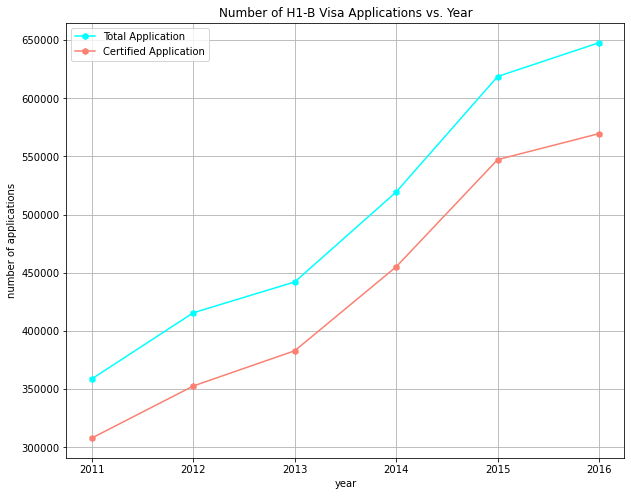

In [2]:
# Number of applications and year (status of application)
totaldf = df.groupby(['YEAR']).count() # count total numer of applications per year
certifieddf = df[df.CASE_STATUS == 'CERTIFIED'].groupby(['YEAR']).count()# count certified numer of applications per year
certifieddf['year'] = certifieddf.index

#graph
plt.figure(figsize = (10,8))
plt.plot(certifieddf.year, totaldf.CASE_STATUS, marker = 'h', label = 'Total Application', color = 'aqua')
plt.plot(certifieddf.year, certifieddf.CASE_STATUS, marker = 'h', label = 'Certified Application', color = 'salmon')
plt.grid()
plt.legend()
plt.xlabel('year')
plt.ylabel('number of applications')
plt.title('Number of H1-B Visa Applications vs. Year')

Graph application status percentages

Text(0.5, 1.0, 'Case Status Percentage')

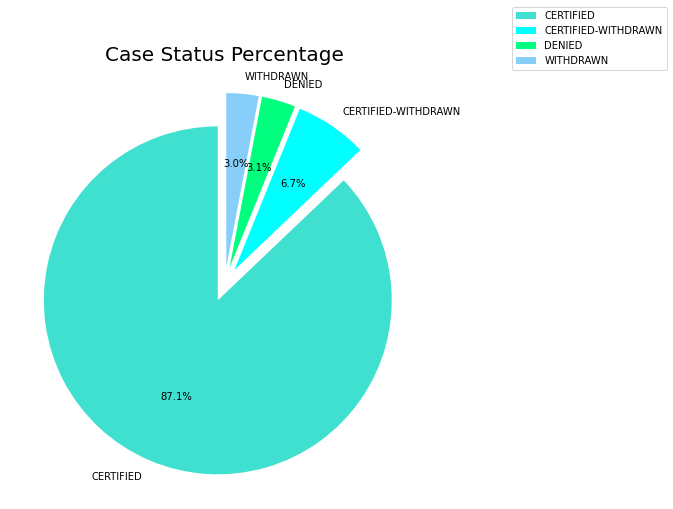

In [3]:
# clean data frame
spdf = df[['CASE_STATUS']]
spdf = spdf[spdf['CASE_STATUS'].notna()]

# status counts
labels = ['CERTIFIED','CERTIFIED-WITHDRAWN','DENIED', 'WITHDRAWN']
counts = {}
for i in labels:
    counts[i] = int(spdf[spdf.CASE_STATUS == i].count())
data = []
for k, v in counts.items():
    data.append(v)
    
# graph pie
plt.figure(figsize = (10,8))
colors = ['turquoise', 'aqua', 'springgreen', 'lightskyblue']
plt.pie(data, labels = labels, startangle=90, colors = colors, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1))
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1.15), ncol=1)  
plt.title('Case Status Percentage', size = 20)

Text(0.5, 1.0, 'Certified Part time vs Full time')

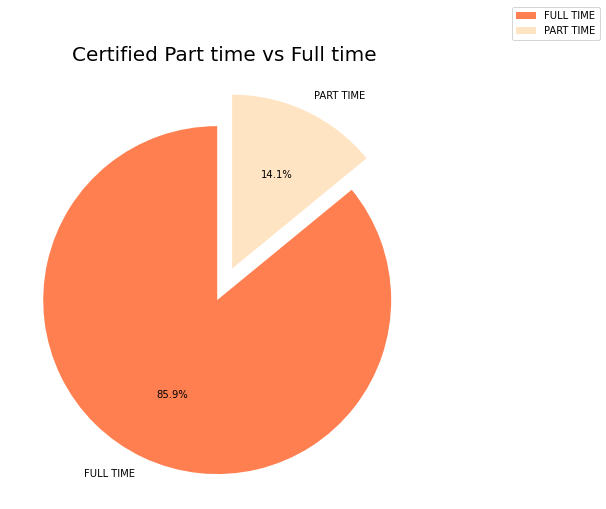

In [4]:
# Certified Part time vs Full time

# clean data frame
certified = df[df['CASE_STATUS'] == 'CERTIFIED']

# create lables and data 
labels2 = ['FULL TIME', 'PART TIME']
data_2 = [len(certified[certified.FULL_TIME_POSITION == 'Y']), len(certified[certified.FULL_TIME_POSITION == 'N'])]

# graph pie
plt.figure(figsize = (10,8))
colors2 = ['coral', 'bisque']
plt.pie(data_2, labels = labels2, startangle=90, colors = colors2, autopct='%1.1f%%', explode=(0.1, 0.1))
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1.15), ncol=1)  
plt.title('Certified Part time vs Full time', size = 20)



## Part 3: Occupation and Salary Analysis
Plot Average wage and year

Text(0, 0.5, 'Average Salary')

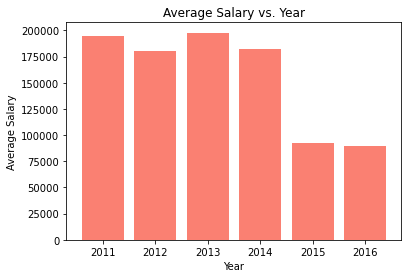

In [5]:
# clean data frame
df_wage = df[df['PREVAILING_WAGE'].notna()]
wanted = ['PREVAILING_WAGE','YEAR']
df_keep = df_wage[wanted]

# group by year and sum wages 
df_wage = df_keep.groupby(['YEAR']).sum()

# group by year and count cases
df_wage['NUMBER OF CASES'] = df_keep.groupby(['YEAR']).size() 

# add new column of average wage
df_wage['AVERAGE WAGE'] = df_wage['PREVAILING_WAGE'] / df_wage['NUMBER OF CASES']

# graph
labels = sorted(list(set(int(i) for i in df_keep['YEAR'])))
average_wage = [i for i in df_wage['AVERAGE WAGE']]
plt.bar(range(len(labels)), average_wage, tick_label = labels, color = 'salmon')
plt.title('Average Salary vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')



    





Plot average wage per year for selected job titles

<ipython-input-6-7bd9fb288d4a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA['YEAR'] = BA.index
<ipython-input-6-7bd9fb288d4a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIA['YEAR'] = BIA.index
<ipython-input-6-7bd9fb288d4a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

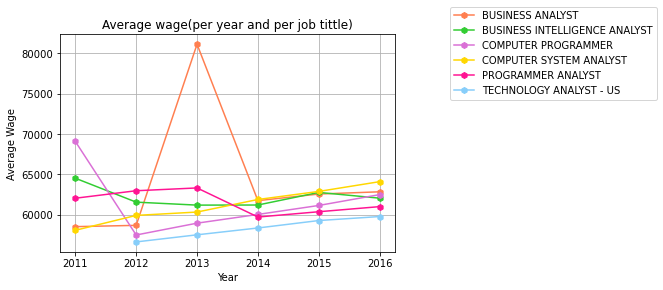

In [6]:
# drop nan values 
df_wj = df[df['JOB_TITLE'].notna()]
df_wj = df_wj[df_wj['YEAR'].notna()]
df_wj = df_wj[df_wj['PREVAILING_WAGE'].notna()]
df_wj = df_wj[df_wj['CASE_STATUS'] == 'CERTIFIED']

# construct dataframe 
wanted = ['JOB_TITLE','YEAR','PREVAILING_WAGE']
df_wj = df_wj[wanted]

# select job titles 
df_wj = df_wj[(df_wj.JOB_TITLE == 'BUSINESS INTELLIGENCE ANALYST')|(df_wj.JOB_TITLE == 'BUSINESS ANALYST')|(df_wj.JOB_TITLE == 'COMPUTER PROGRAMMER')|(df_wj.JOB_TITLE == 'COMPUTER SYSTEM ANALYST')|(df_wj.JOB_TITLE == 'PROGRAMMER ANALYST')|(df_wj.JOB_TITLE == 'SOFTWARE ENGINEER')|(df_wj.JOB_TITLE == 'TECHNOLOGY ANALYST - US')]

# groupby
df_wj1 = df_wj.groupby(['JOB_TITLE','YEAR']).sum()
df_wj1['NUMBER OF CASES'] = df_wj.groupby(['JOB_TITLE','YEAR']).size()
df_wj1['AVERAGE_WAGE'] = df_wj1['PREVAILING_WAGE'] / df_wj1['NUMBER OF CASES']

# graph
BA = df_wj1.loc['BUSINESS ANALYST']
BA['YEAR'] = BA.index
plt.plot(BA['YEAR'], BA['AVERAGE_WAGE'], marker = 'h', color = 'coral', label = 'BUSINESS ANALYST')

BIA = df_wj1.loc['BUSINESS INTELLIGENCE ANALYST']
BIA['YEAR'] = BIA.index
plt.plot(BIA['YEAR'], BIA['AVERAGE_WAGE'], marker = 'h', color = 'limegreen', label = 'BUSINESS INTELLIGENCE ANALYST')

CP = df_wj1.loc['COMPUTER PROGRAMMER']
CP['YEAR'] = CP.index
plt.plot(CP['YEAR'], CP['AVERAGE_WAGE'], marker = 'h', color = 'orchid', label = 'COMPUTER PROGRAMMER')

CSA = df_wj1.loc['COMPUTER SYSTEM ANALYST']
CSA['YEAR'] = CSA.index
plt.plot(CSA['YEAR'], CSA['AVERAGE_WAGE'], marker = 'h', color = 'gold', label = 'COMPUTER SYSTEM ANALYST')

PA = df_wj1.loc['PROGRAMMER ANALYST']
PA['YEAR'] = PA.index
plt.plot(PA['YEAR'], PA['AVERAGE_WAGE'], marker = 'h', color = 'deeppink', label = 'PROGRAMMER ANALYST')

TA = df_wj1.loc['TECHNOLOGY ANALYST - US']
TA['YEAR'] = TA.index
plt.plot(TA['YEAR'], TA['AVERAGE_WAGE'], marker = 'h', color = 'lightskyblue', label = 'TECHNOLOGY ANALYST - US')

plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1.15), ncol=1)
plt.title('Average wage(per year and per job tittle)')
plt.xlabel('Year')
plt.ylabel('Average Wage')
plt.grid()



Plot top and bottom paying occupations and their approval rates

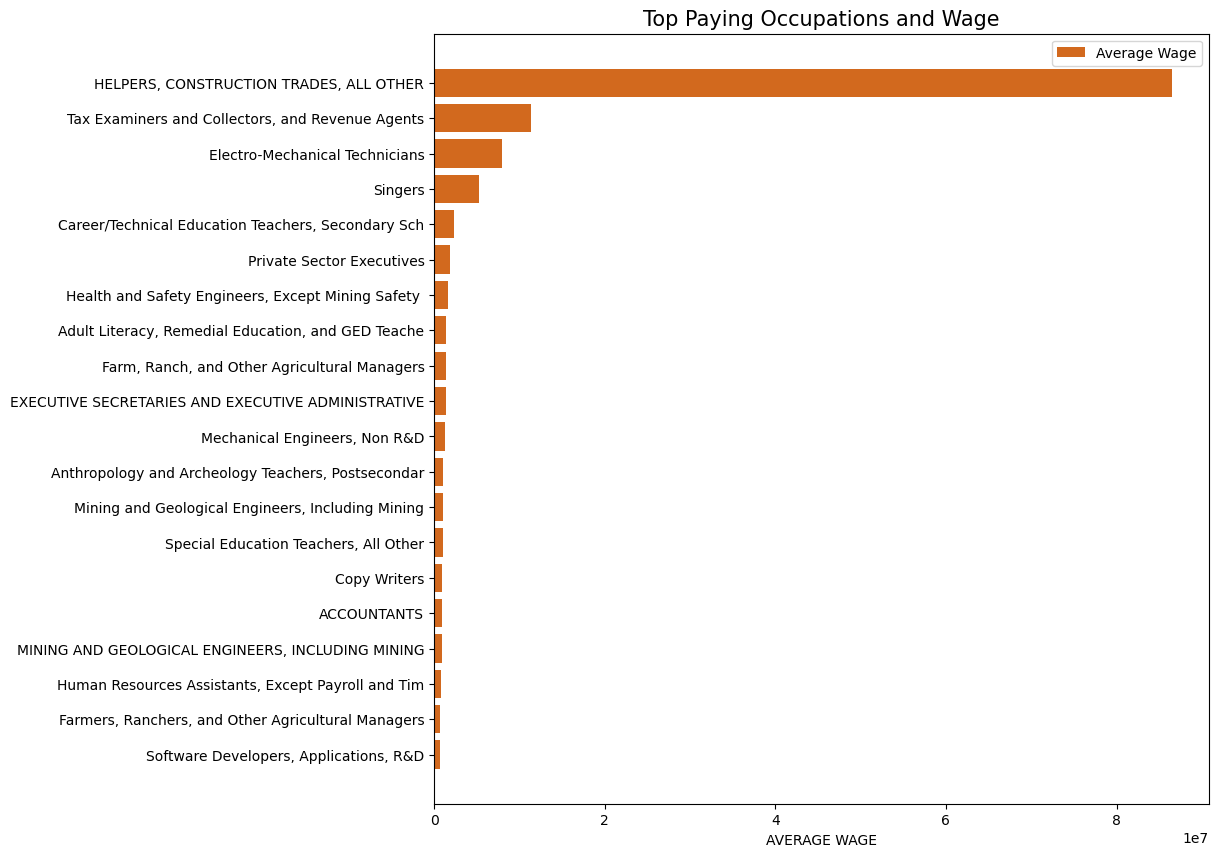

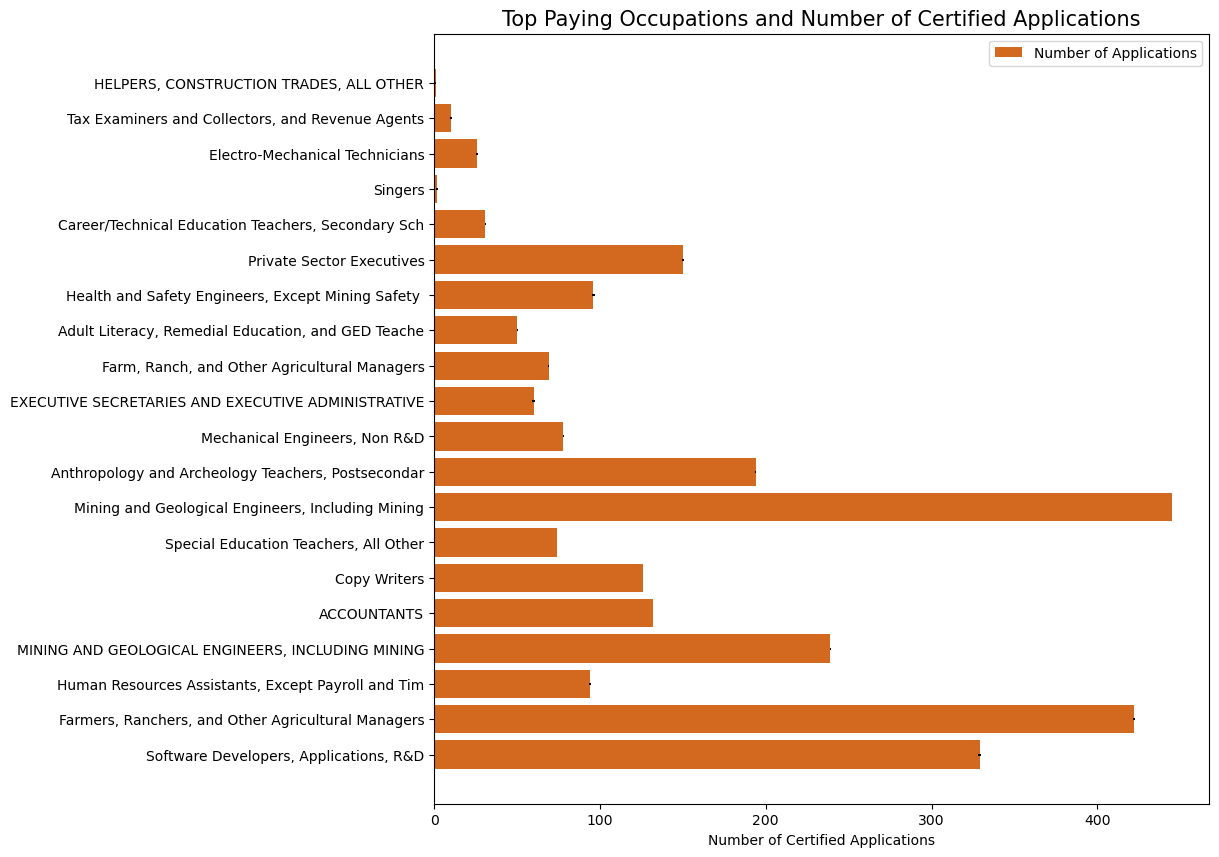

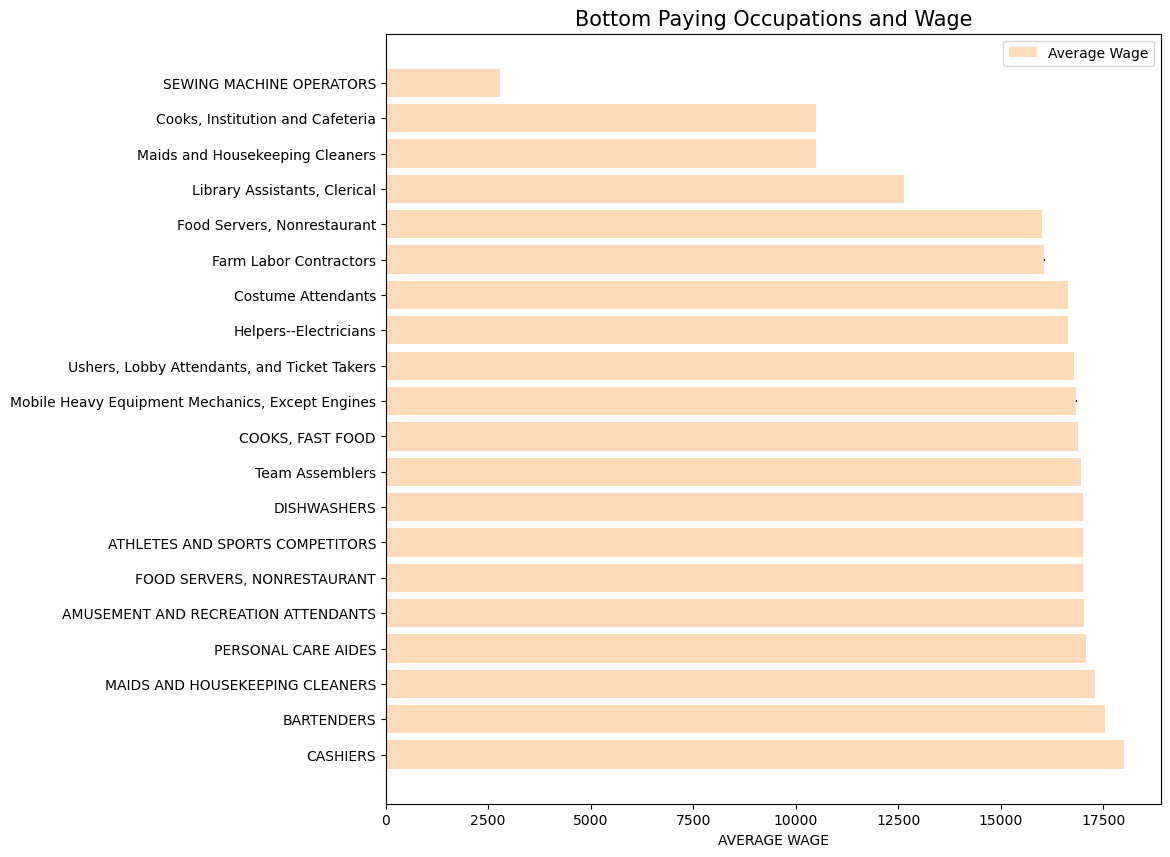

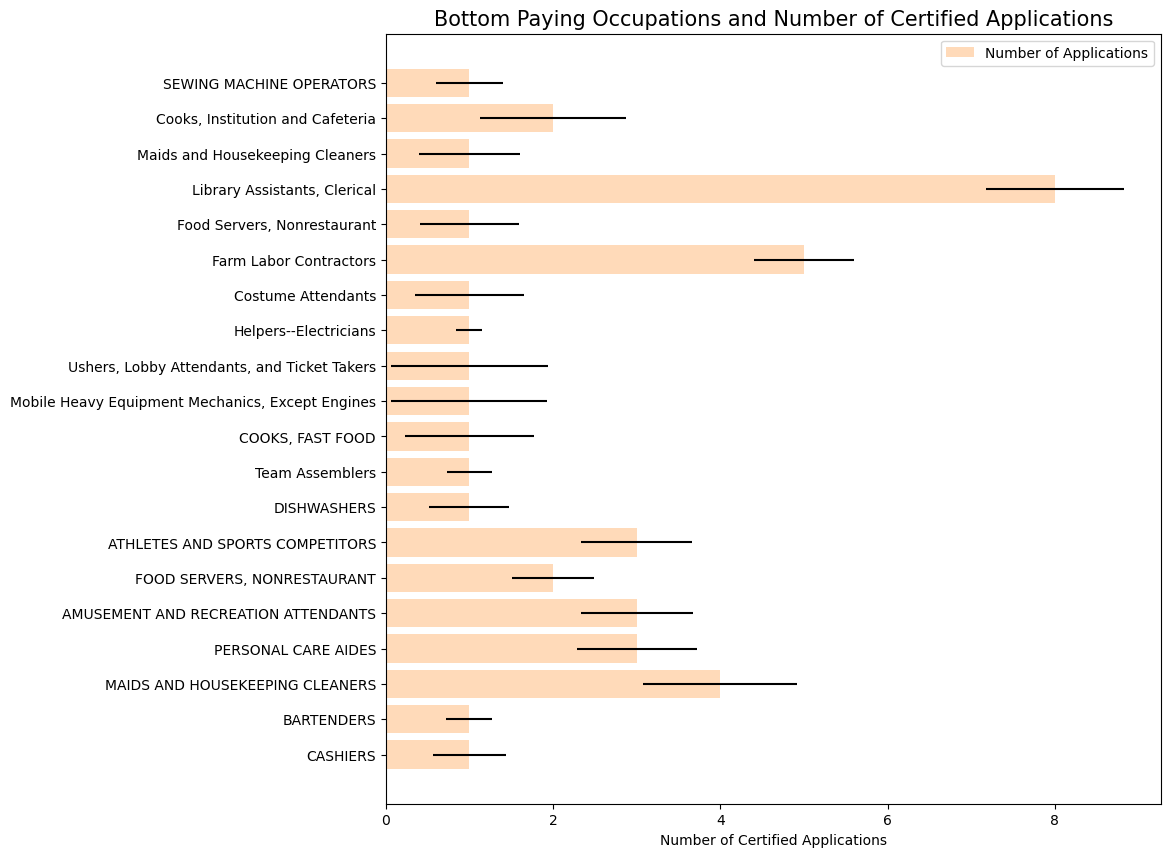

In [7]:
# clean data frame
dfaw = df[(df.CASE_STATUS == 'CERTIFIED')]
dfaw = df[df['PREVAILING_WAGE'].notna()]
dfaw = df[df['SOC_NAME'].notna()]
wanted = ['PREVAILING_WAGE','SOC_NAME']
dfaw = dfaw[wanted]

# calculate average wage for each occupation
df_summed_wage = dfaw.groupby(['SOC_NAME']).sum()
df_summed_wage['NUMBER OF CASES'] = dfaw.groupby(['SOC_NAME']).count()
df_summed_wage['AVERAGE WAGE'] = df_summed_wage['PREVAILING_WAGE'] / df_summed_wage['NUMBER OF CASES']

# top 20 paying occupation
dfaw_highest = df_summed_wage.sort_values(by='AVERAGE WAGE', ascending=False).head(20)
dfaw_highest['occupation'] = dfaw_highest.index
labels_highest = dfaw_highest['occupation']

# bottom 20 paying occupation
dfaw_lowest = df_summed_wage.sort_values(by='AVERAGE WAGE', ascending=True).head(20)
dfaw_lowest['occupation'] = dfaw_lowest.index
labels_lowest = dfaw_lowest['occupation']

# graph top highest paying occupation vs. average wage
import numpy as np
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,10))
y_pos = np.arange(len(labels_highest))
error = np.random.rand(len(labels_highest))
ax.barh(y_pos, dfaw_highest['AVERAGE WAGE'], xerr=error, align='center', label = 'Average Wage', color = 'chocolate')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_highest)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AVERAGE WAGE', size = 10)
ax.set_title('Top Paying Occupations and Wage', size = 15)
plt.yticks(size = 10)
plt.legend(prop={"size":10})

# graph highest paying occupations vs. number of cases
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,10))
y_pos = np.arange(len(labels_highest))
error = np.random.rand(len(labels_highest))
ax.barh(y_pos, dfaw_highest['NUMBER OF CASES'], xerr=error, align='center', label = 'Number of Applications',color = 'chocolate')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_highest)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Certified Applications', size = 10)
ax.set_title('Top Paying Occupations and Number of Certified Applications', size = 15)
plt.yticks(size = 10)
plt.legend(prop={"size":10})

# graph top lowest paying occupation vs. average wage
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,10))
y_pos = np.arange(len(labels_lowest))
error = np.random.rand(len(labels_lowest))
ax.barh(y_pos, dfaw_lowest['AVERAGE WAGE'], xerr=error, align='center', label = 'Average Wage', color = 'peachpuff')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_lowest)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AVERAGE WAGE', size = 10)
ax.set_title('Bottom Paying Occupations and Wage', size = 15)
plt.yticks(size = 10)
plt.legend(prop={"size":10})

# graph lowest paying occupations vs. number of cases
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,10))
y_pos = np.arange(len(labels_lowest))
error = np.random.rand(len(labels_lowest))
ax.barh(y_pos, dfaw_lowest['NUMBER OF CASES'], xerr=error, align='center', label = 'Number of Applications', color = 'peachpuff')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_lowest)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Certified Applications', size = 10)
ax.set_title('Bottom Paying Occupations and Number of Certified Applications', size = 15)
plt.yticks(size = 10)
plt.legend(prop={"size":10})


## Part 4: Occupations and Approval Rates
Plot occupations with the highest certification rates

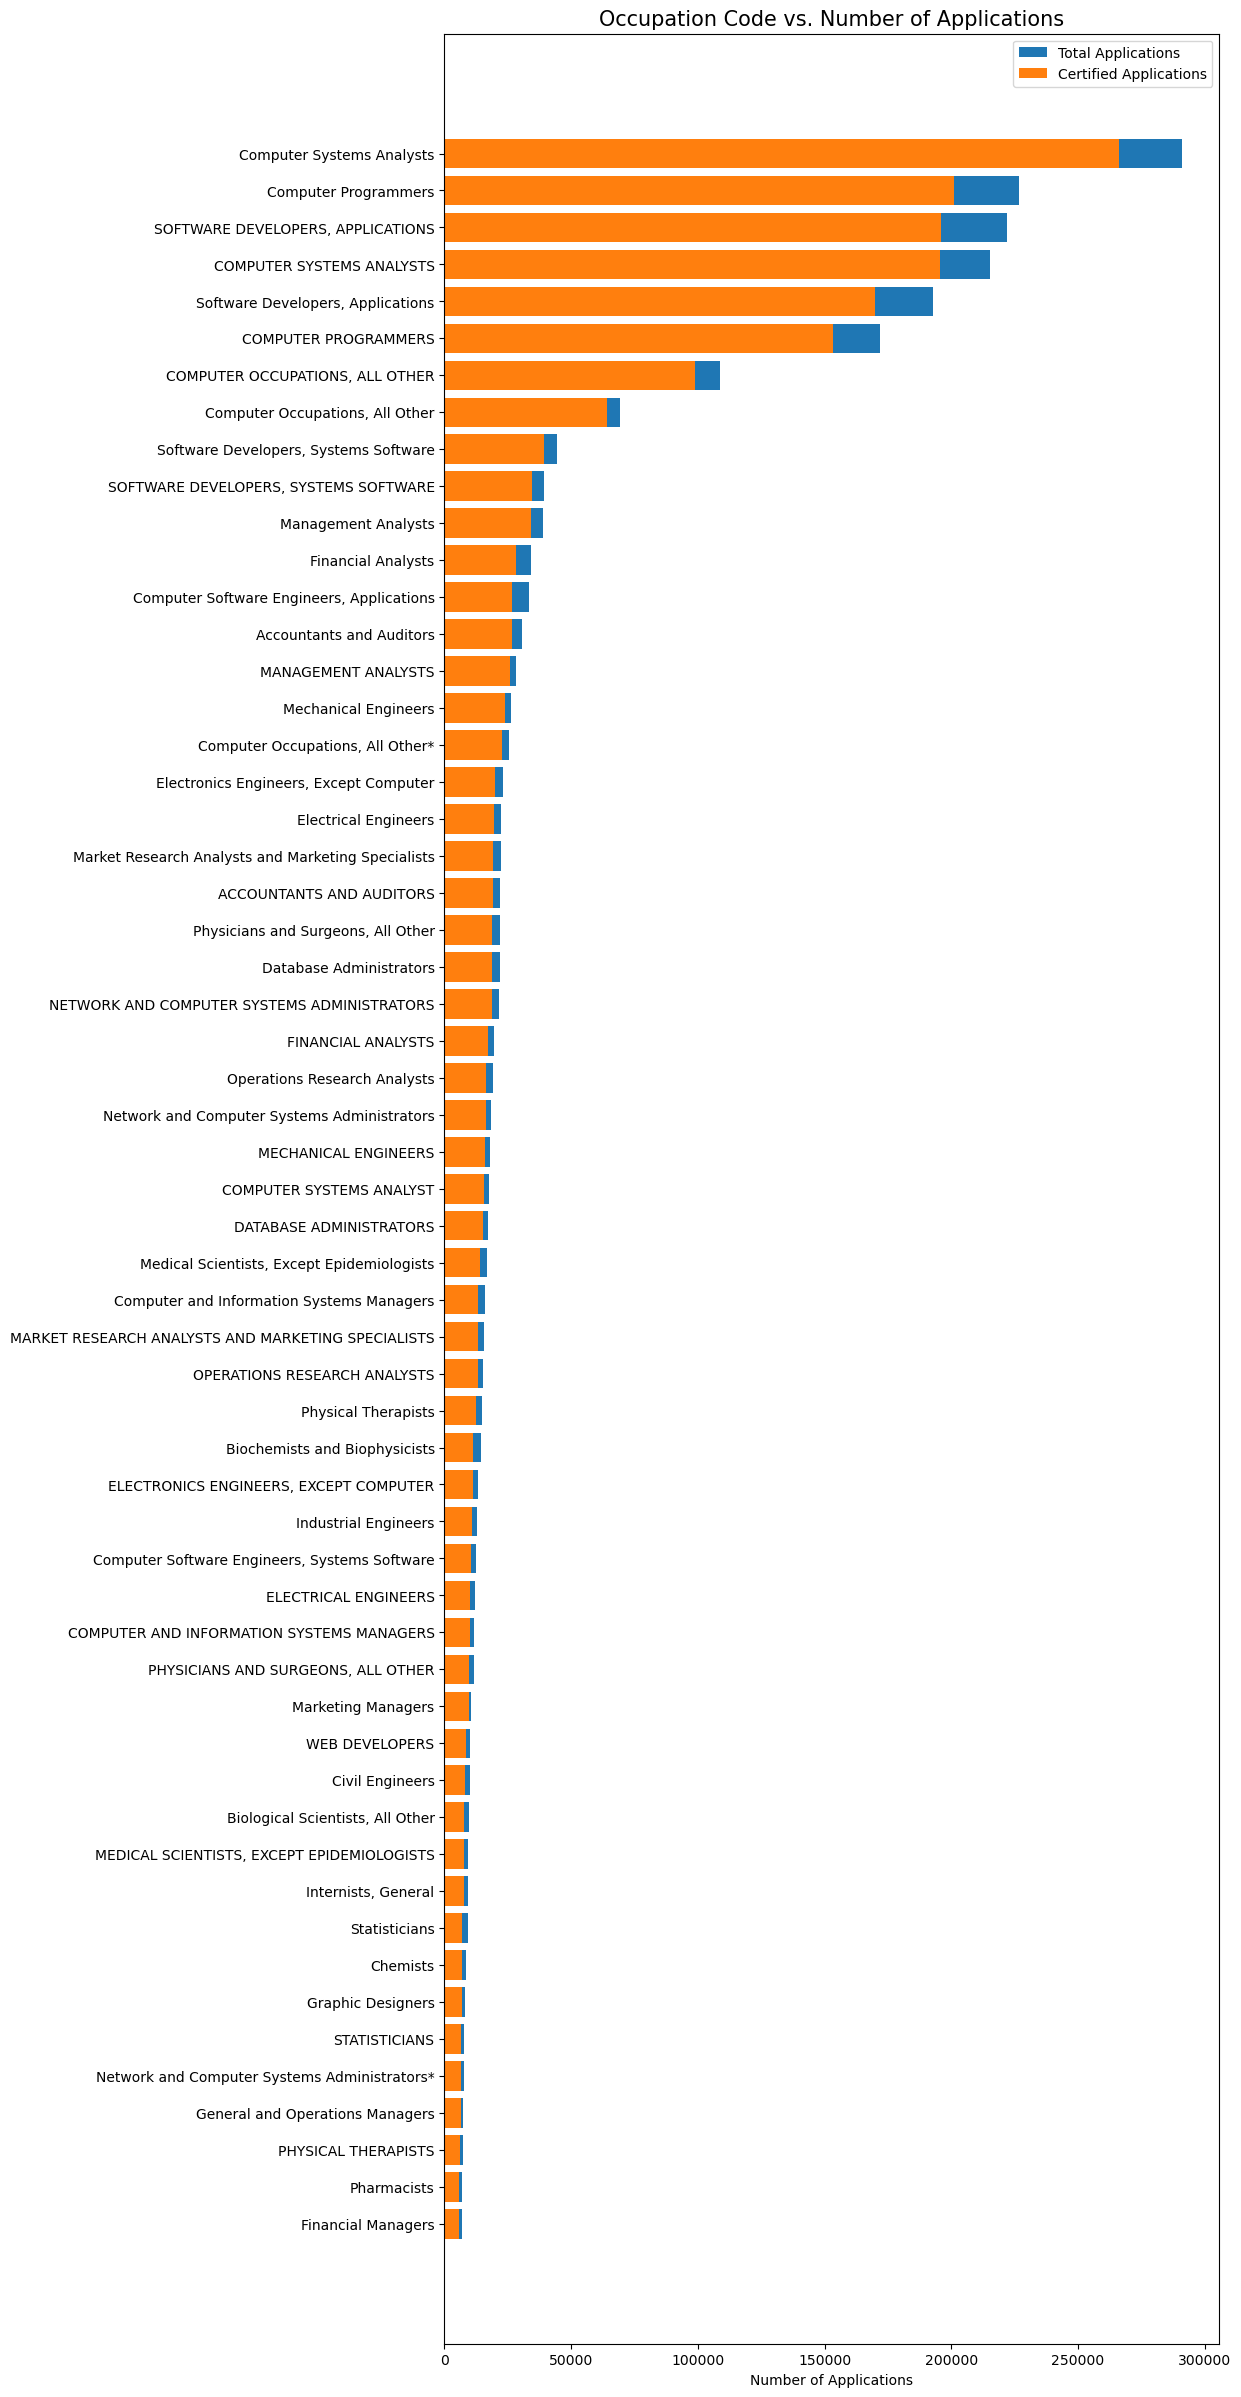

In [8]:
# occupations and number of total applications
# group by occupation and count number of total occupations
df_oc = df.groupby(['SOC_NAME']).count()
df_oc['size'] = df.groupby(['SOC_NAME']).size()
# select occupations with more than 7000 applicants
df_oc = df_oc[df_oc['size'] > 7000]
df_oc = df_oc.sort_values(by='size', ascending=False)
df_oc['SOC_NAME'] = df_oc.index

# top 60 most applied occupations
labels = df_oc['SOC_NAME']

# occupations and number of certified applications
df_cf = df[(df.CASE_STATUS == 'CERTIFIED')]
df_cf = df_cf[df_cf['SOC_NAME'].isin(labels)]
# group by occupation and count number of certified occupations
df_cf = df_cf.groupby('SOC_NAME').count()
df_cf = df_cf.sort_values(by = 'CASE_STATUS', ascending=False)

# graph
import numpy as np
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,30))
y_pos = np.arange(len(labels))
Total = df_oc['size']
Certified = df_cf['CASE_STATUS']
error = np.random.rand(len(labels))
ax.barh(y_pos, Total, xerr=error, align='center', label = 'Total Applications')
ax.barh(y_pos, Certified, xerr=error, align='center', label = 'Certified Applications')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Applications', size = 10)
ax.set_title('Occupation Code vs. Number of Applications', size = 15)
plt.yticks(size = 10)
plt.legend(prop={"size":10})






## Part 5: Employers and Application Status
Plot occupations with the highest number of applications

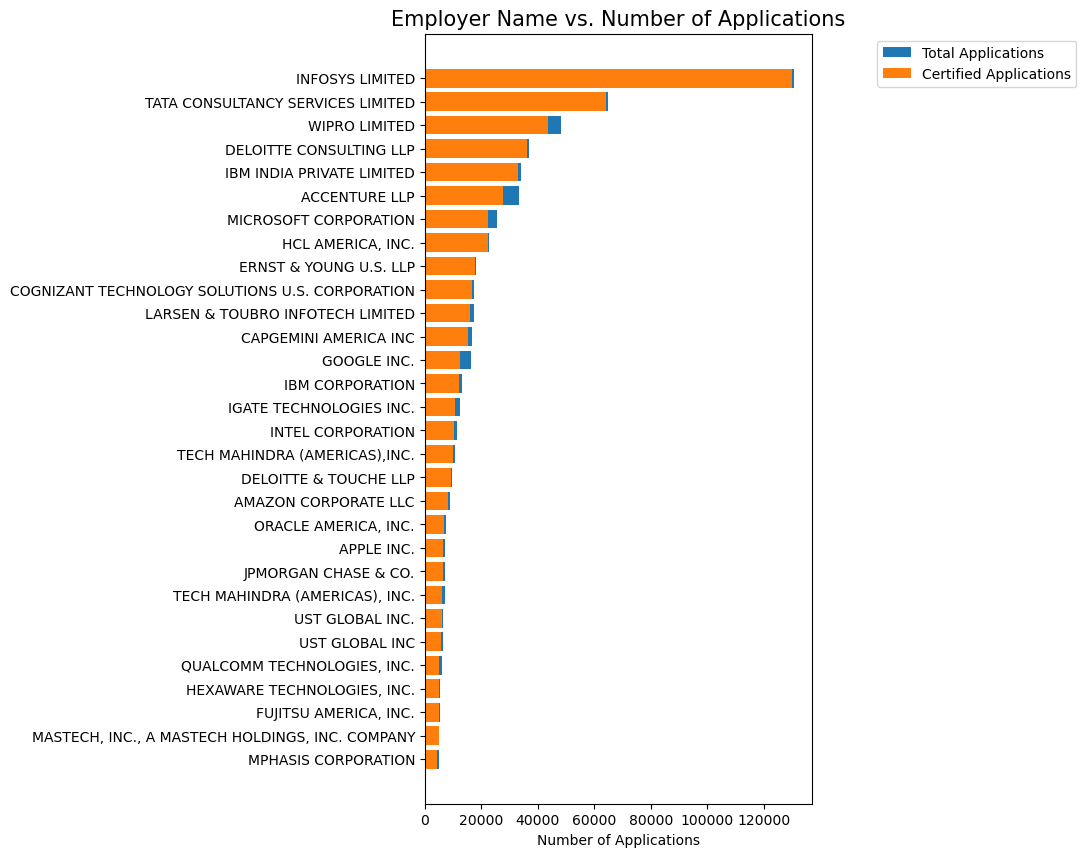

In [9]:
# Employer name and number of applications

# employer name and number of total applications
df_en = df.groupby(['EMPLOYER_NAME']).count()
df_en = df_en[df_en['CASE_STATUS'] > 5000]
df_en = df_en.sort_values(by='CASE_STATUS', ascending=False)
df_en['EMPLOYER_NAME'] = df_en.index

# top 20 most applied occupations
labels = df_en['EMPLOYER_NAME']

# occupations and number of certified applications
df_cfen = df[(df.CASE_STATUS == 'CERTIFIED')]
df_cfen = df_cfen[df_cfen['EMPLOYER_NAME'].isin(labels)]
df_cfen = df_cfen.groupby('EMPLOYER_NAME').count()
df_cfen = df_cfen.sort_values(by = 'CASE_STATUS', ascending=False)
df_cfen['EMPLOYER_NAME'] = df_cfen.index

# graph
import numpy as np
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (5,10))
y_pos = np.arange(len(labels))
Total = df_en['CASE_STATUS']
Certified = df_cfen['CASE_STATUS']
error = np.random.rand(len(labels))
ax.barh(y_pos, Total, xerr=error, align='center', label = 'Total Applications')
ax.barh(y_pos, Certified, xerr=error, align='center', label = 'Certified Applications')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Applications', size = 10)
ax.set_title('Employer Name vs. Number of Applications', size = 15)
plt.yticks(size = 10)
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1), ncol=1, prop={"size":10})





Employers with the highest h1-b visa approval rate

<ipython-input-10-d15da2c8c17e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Total'] = df_en[['CASE_STATUS']]
<ipython-input-10-d15da2c8c17e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Certified'] = df_cfen[['CASE_STATUS']]
<ipython-input-10-d15da2c8c17e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

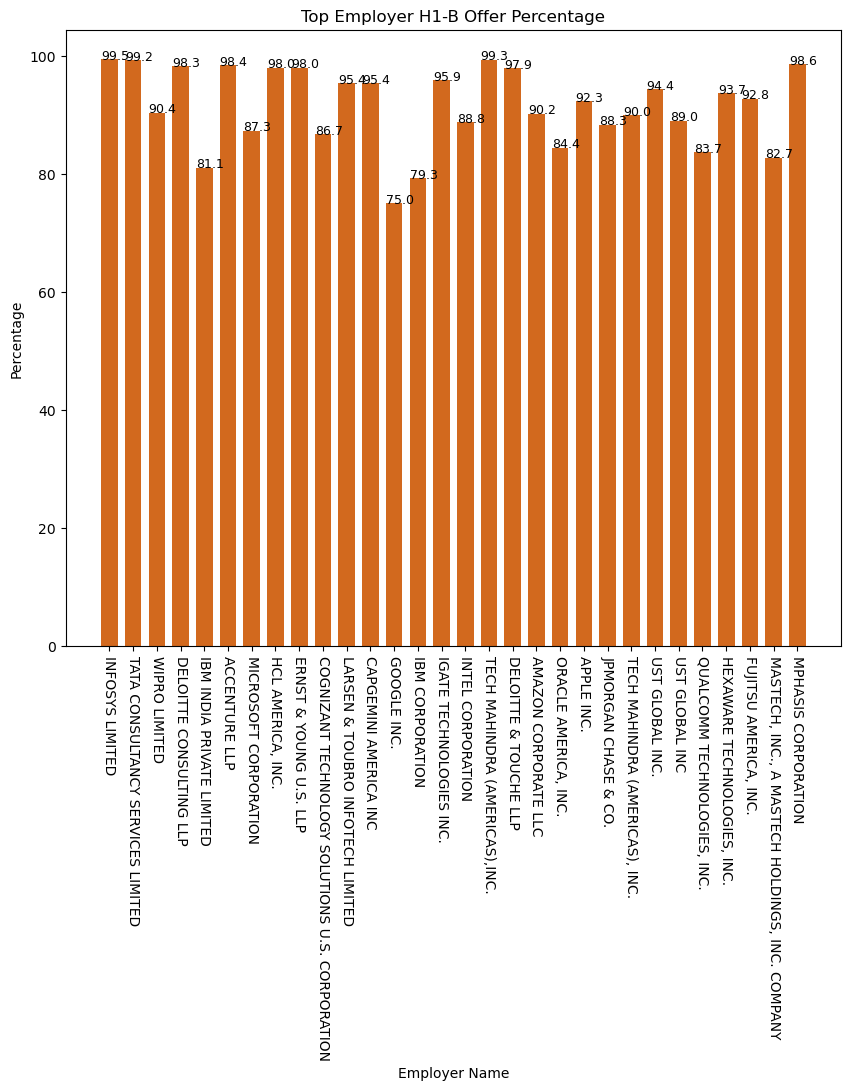

In [10]:
# create new data frame 
df_new = df_en[['EMPLOYER_NAME']]
df_new['Total'] = df_en[['CASE_STATUS']]
df_new['Certified'] = df_cfen[['CASE_STATUS']]
df_new['Percentage'] = df_new['Certified'] / df_new['Total'] * 100

# graph 
plt.figure(figsize = (10,8))
plt.xticks(rotation = 270)
plt.xlabel('Employer Name')
plt.ylabel('Percentage')
plt.title('Top Employer H1-B Offer Percentage')
bars = plt.bar(x=df_new['EMPLOYER_NAME'], height=df_new['Percentage'], width=0.7, color = 'chocolate')

# add percentages to graph
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 1), fontsize = 9)


## Part 5: States with the Highest Certified  Rates
Plot heatmap using lats and lngs data and google map API

In [11]:
# Number of certified applications and state (location and application)
# clean data frame
cfdf = df[(df.CASE_STATUS == 'CERTIFIED')]
wanted = ['lat','lon']
cfdf = cfdf[wanted]
cfdf = cfdf[cfdf['lat'].notna()]
cfdf = cfdf[cfdf['lon'].notna()]

# graph
import gmaps
import gmaps.datasets
gmaps.configure(api_key='...')
fig = gmaps.figure()
locations = cfdf[['lat', 'lon']]
# create heat map layer
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)


fig

Figure(layout=FigureLayout(height='420px'))

## screenshoted result
for the purpose of protecting api key
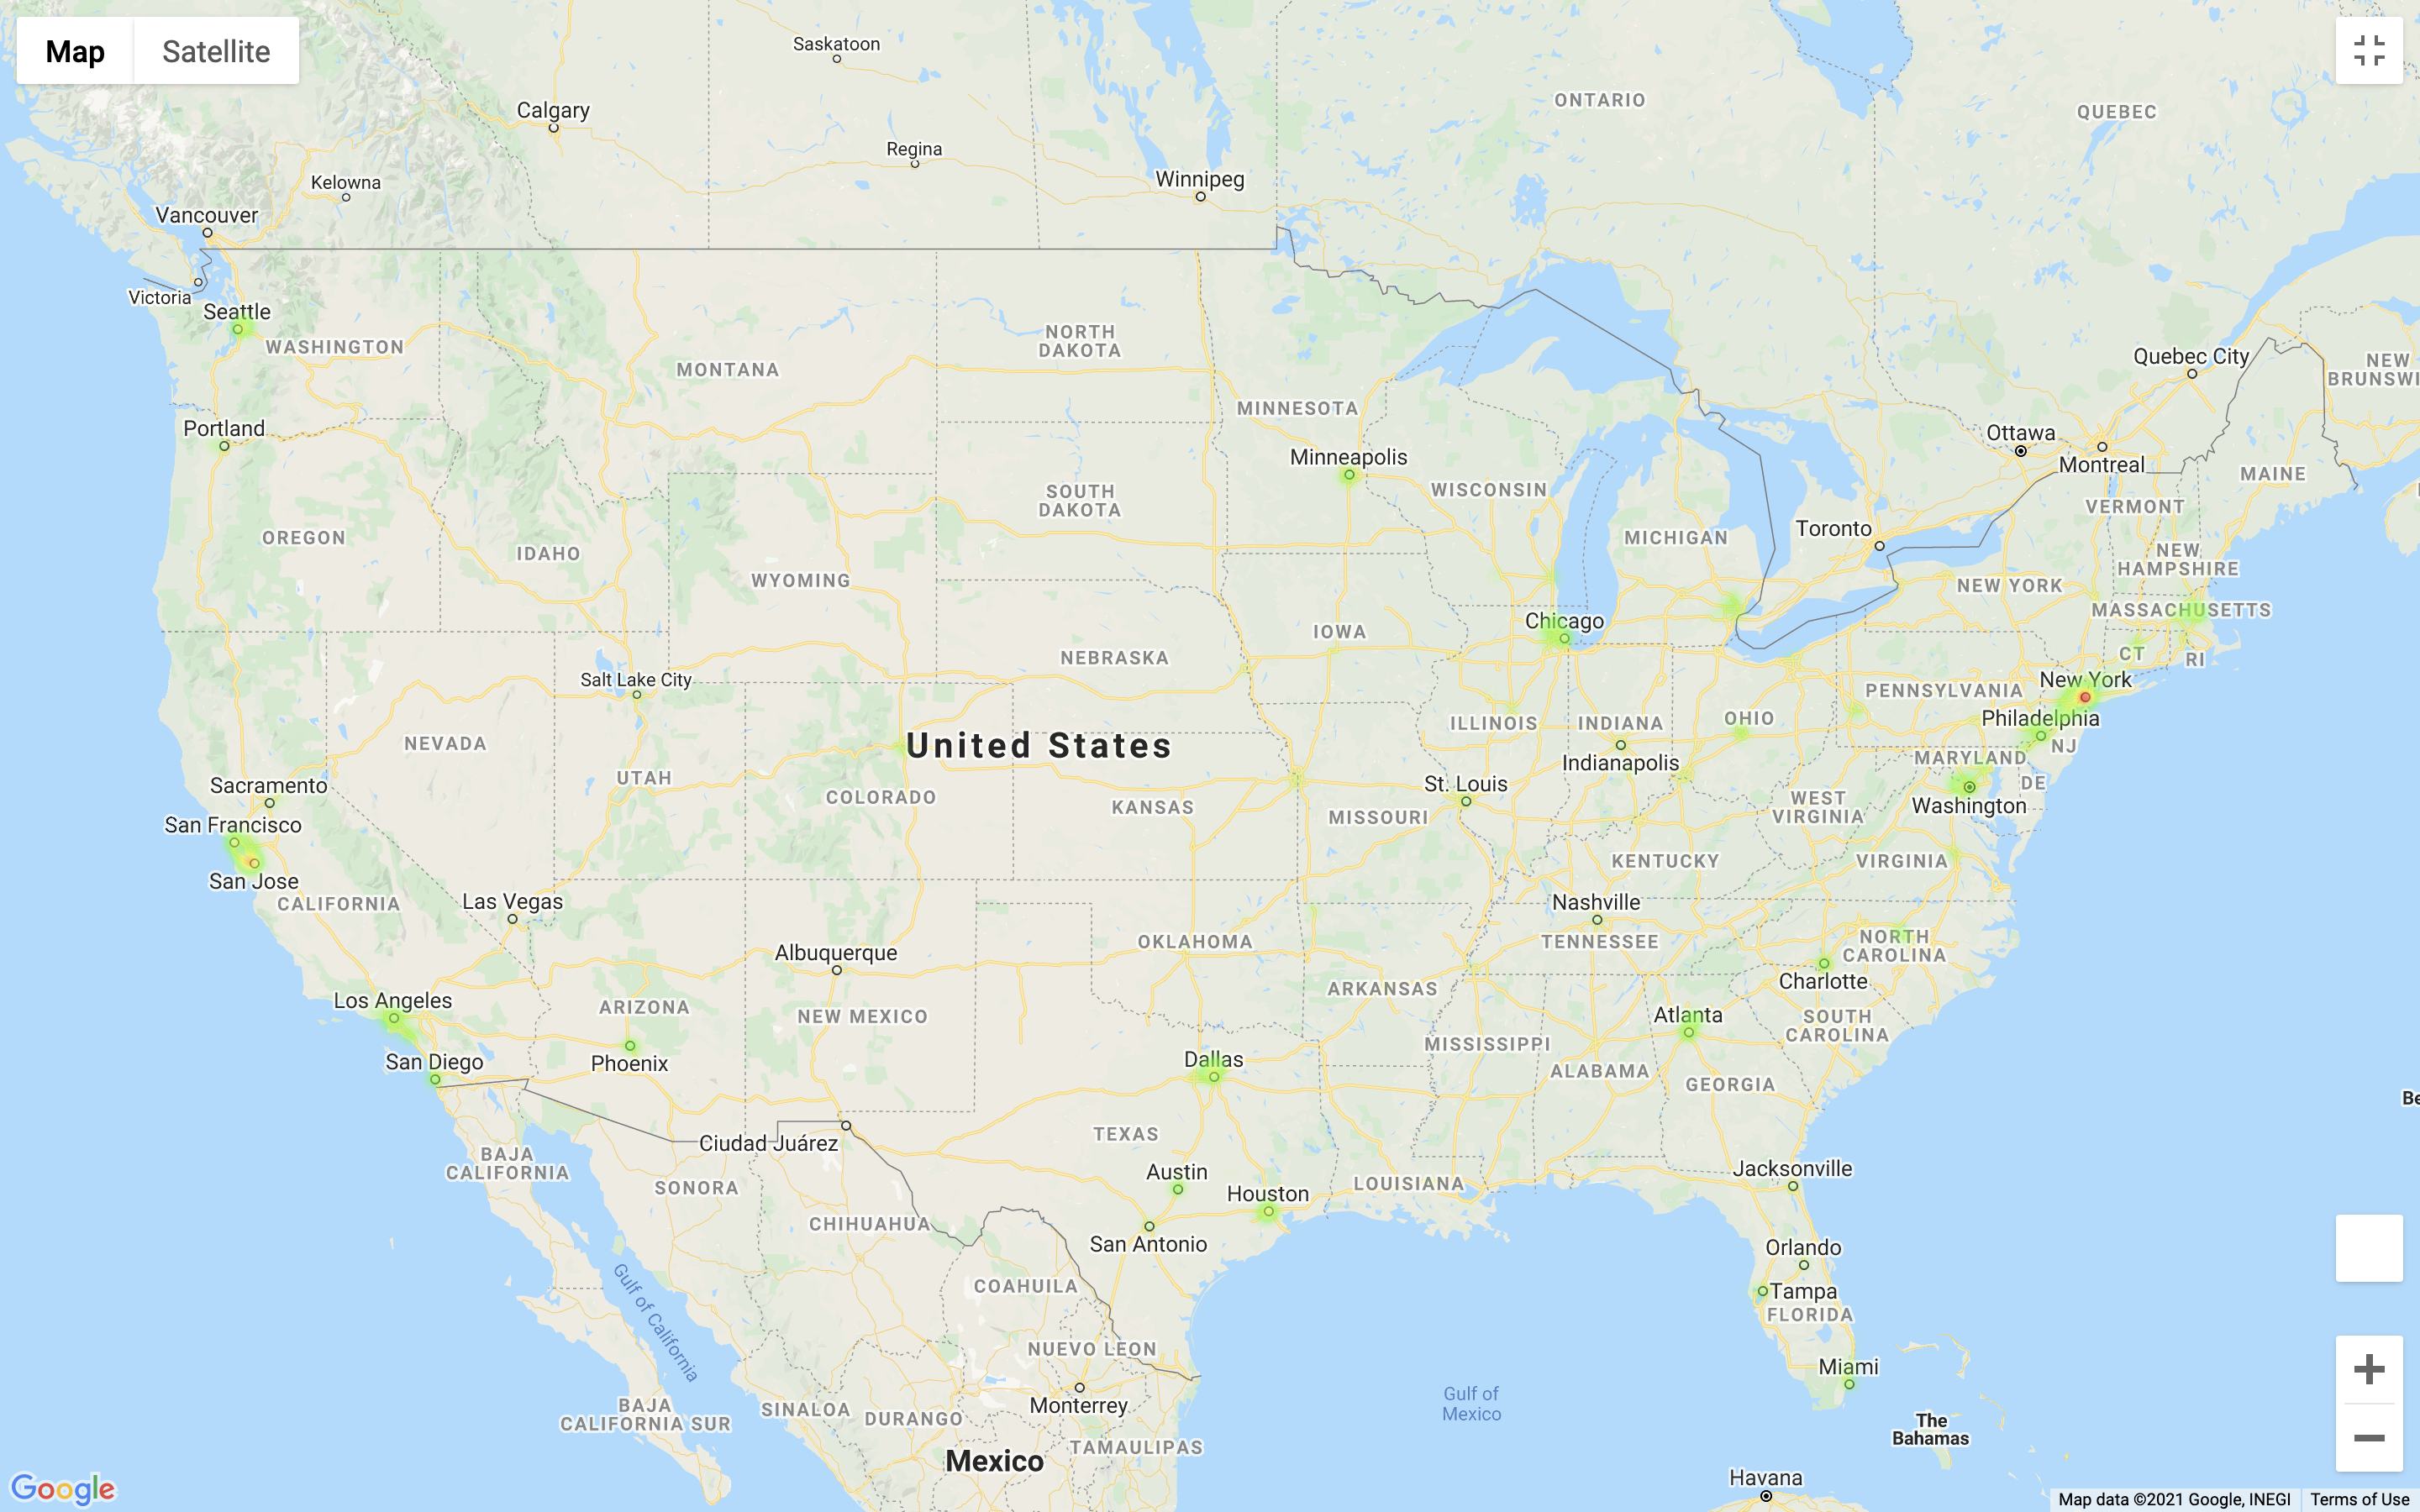